<a href="https://colab.research.google.com/github/Mahnazshamissa/Python/blob/main/Titanic_train_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, plot_precision_recall_curve

In [3]:
abo_path = '/content/train.csv'
p_df_raw_train = pd.read_csv(abo_path, sep=',', encoding="UTF-8")

In [4]:
p_df_raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
p_df_raw_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
p_df_raw_train.Age = p_df_raw_train.Age.fillna(-1)
p_df_raw_train.Cabin = p_df_raw_train.Cabin.fillna('NA')
p_df_raw_train.Embarked = p_df_raw_train.Embarked.fillna('NA')

# **Check class frequencies**

In [7]:
y = p_df_raw_train.Survived
sum(y), sum(y)/len(y)*100

(342, 38.38383838383838)

# **Transform the data: make every column into number and scale the values of each column**

In [8]:
df_y = p_df_raw_train['Survived']
df_X_raw = p_df_raw_train.drop(['Name'], axis=1)

columns=df_X_raw.columns
for f in df_X_raw.columns:
    if df_X_raw[f].dtype == 'object':
        df_X_raw[f] = LabelEncoder().fit_transform(list(df_X_raw[f]))

# **Also try out "power transform" from sklearn.preprocessing**

In [9]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_X_raw)
df_X = pd.DataFrame(scaled_df, columns=columns)

In [10]:
class_labels = np.unique(df_y)
class_weights = compute_class_weight('balanced', class_labels, df_y)
class_weights = dict(zip(class_labels, class_weights))

In [11]:
class_weights

{0: 0.8114754098360656, 1: 1.3026315789473684}

In [12]:
df_X = df_X.reset_index()

In [13]:
np.any(np.isnan(df_X))

False

In [14]:
np.all(np.isfinite(df_X))

True

In [15]:
df_X.isna().sum()

index          0
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# **Default parameters**

In [16]:
C=1.0
kernel='rbf',
degree=3,
gamma='scale',
coef0=0.0,
shrinking=True,
probability=False,
tol=0.001,
cache_size=200,
class_weight=None,
verbose=False,
max_iter=-1,
decision_function_shape='ovr',
break_ties=False,
random_state=None

In [17]:
clf = svm.SVC(C=1.0, class_weight=class_weights)

In [18]:
clf.fit(df_X, df_y)

SVC(C=1.0, break_ties=False, cache_size=200,
    class_weight={0: 0.8114754098360656, 1: 1.3026315789473684}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
clf_train_pred = clf.predict(df_X)

In [20]:
auc_train = roc_auc_score(df_y, clf_train_pred)
print('\nAUROC.....', auc_train)


AUROC..... 0.5320918416259227


In [21]:
fpr, tpr, threshold = roc_curve(df_y, clf_train_pred)

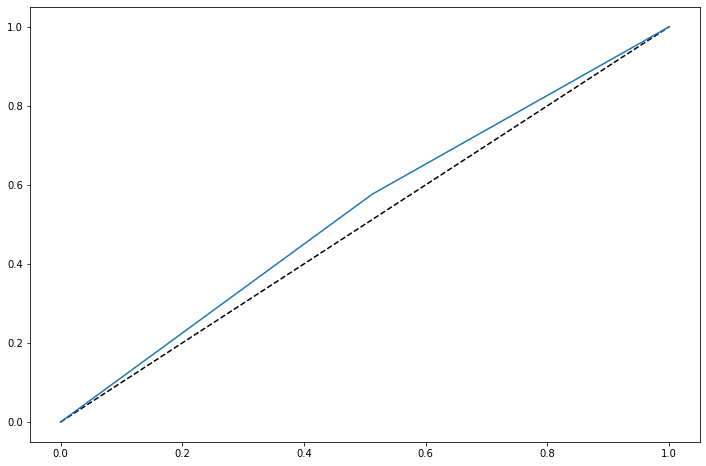

In [22]:
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(1,1,1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr);

In [23]:
print('Accuracy')
print(accuracy_score(df_y, clf_train_pred))
print('Confusion Matrix')
print(confusion_matrix(df_y, clf_train_pred))
print('Confusion Report')
print(classification_report(df_y, clf_train_pred))

Accuracy
0.5218855218855218
Confusion Matrix
[[268 281]
 [145 197]]
Confusion Report
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       549
           1       0.41      0.58      0.48       342

    accuracy                           0.52       891
   macro avg       0.53      0.53      0.52       891
weighted avg       0.56      0.52      0.53       891



In [36]:
clf = svm.SVC(C=50.0, kernel= 'poly', class_weight=class_weights)

In [37]:
clf.fit(df_X, df_y)

SVC(C=50.0, break_ties=False, cache_size=200,
    class_weight={0: 0.8114754098360656, 1: 1.3026315789473684}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
clf_train_pred = clf.predict(df_X)

In [41]:
auc_train = roc_auc_score(df_y, clf_train_pred)
print('\nAUROC.....', auc_train)


AUROC..... 0.8834244080145719


In [42]:
fpr, tpr, threshold = roc_curve(df_y, clf_train_pred)

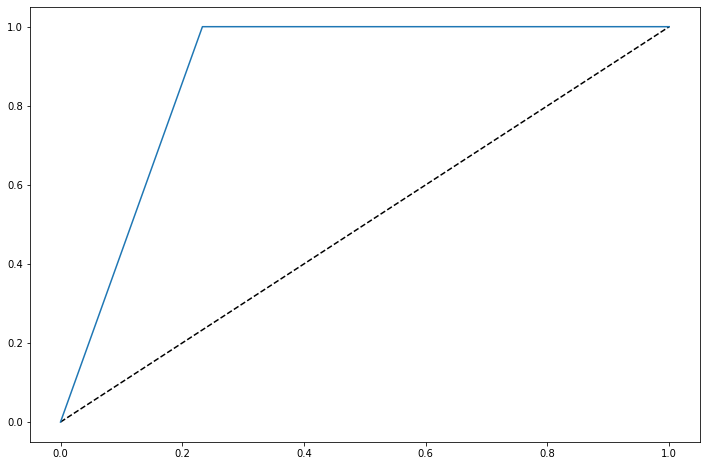

In [43]:
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(1,1,1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr);

In [44]:
print('Accuracy')
print(accuracy_score(df_y, clf_train_pred))
print('Confusion Matrix')
print(confusion_matrix(df_y, clf_train_pred))
print('Confusion Report')
print(classification_report(df_y, clf_train_pred))

Accuracy
0.856341189674523
Confusion Matrix
[[421 128]
 [  0 342]]
Confusion Report
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       549
           1       0.73      1.00      0.84       342

    accuracy                           0.86       891
   macro avg       0.86      0.88      0.86       891
weighted avg       0.90      0.86      0.86       891

